#  Indicators of World Development and COVID19 Impacts

##  The aim of the Project is to analysis to answer interesting questions about the world development indicators and COVID19 Impacts dataset that was provided by the World Bank and

###  Loading libraries

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

from scipy import stats
import numpy as np

from datetime import datetime
from dateutil.parser import parse
from pandas.tseries.offsets import Hour, Minute


# generate gaussian data
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

import urllib.request, urllib.parse
from urllib.error import HTTPError,URLError
import pandas as pd
import json

### Initial Data Analysis EDA

#### Environment, Social And Governance Data - .csv file to Dataframe

In [2]:
df_Country = pd.read_csv('C:/Users/ragun/Documents/GitHub/DSC540/Weeks 5 & 6/Dataset/ESG_csv/ESGCountry.csv')
df_ESGData = pd.read_csv('C:/Users/ragun/Documents/GitHub/DSC540/Weeks 5 & 6/Dataset/ESG_csv/ESGData.csv')
df_ESGSeriesData = pd.read_csv('C:/Users/ragun/Documents/GitHub/DSC540/Weeks 5 & 6/Dataset/ESG_csv/ESGCountry-Series.csv')

#### Health Nutrition And Population Data - .csv file to Dataframe

In [3]:
df_HNPQData = pd.read_csv('C:/Users/ragun/Documents/GitHub/DSC540/Weeks 5 & 6/Dataset/hnpq_csv/HNPQData.csv')
df_HNPQSeriesData = pd.read_csv('C:/Users/ragun/Documents/GitHub/DSC540/Weeks 5 & 6/Dataset/hnpq_csv/HNPQSeries.csv')

#### COVID19 Impact on Daily Life - .csv file to Dataframe

In [4]:
df_COVIDData = pd.read_csv('C:/Users/ragun/Documents/GitHub/DSC540/Weeks 5 & 6/Dataset/COVID19 Impact/Global_Mobility_Report.csv')

C:\Users\ragun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3155: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
#df_Country.describe
#df_Country.head(5)

#df_ESGData.describe
#df_ESGData.head(5)

#df_HNPQData.describe
#df_HNPQData.head(5)

In [90]:
country_population = pd.read_csv("country_population.csv")
fertility_rate = pd.read_csv("fertility_rate.csv")
life_expectancy = pd.read_csv("life_expectancy.csv")

## Data Transfer and Clean Up - Country Dataset

In [6]:
# Renaming the Columns
mapping = {'Country Code':'country_code', 'Short Name':'Country', 'Table Name':'Country_Name', 'Long Name':'Country_FullName'}
df_Country.rename(columns=mapping, inplace=True)

# Dropping few unwanted columns
df_Country.drop(columns='Special Notes', inplace=True)
df_Country.drop(columns='System of trade', inplace=True)

# Removing the data with NA data
df_Country.Country.dropna()

#Replacing Nan values wiht No Data
df_Country['Latest population census'].fillna('No Data')

# Verifying if any duplicates, null available in the dataset
print("Country Name is duplictaed - {}".format(any(df_Country.Country.duplicated())))
print("Country Name contains NaN - %r " % df_Country.Country.isnull().values.any())


Country Name is duplictaed - False
Country Name contains NaN - False 


### Fuzzy Matching on the County and Country Full Name

In [7]:
def checker(wrong_options,correct_options):
    names_array=[]
    ratio_array=[]    
    for wrong_option in wrong_options:
        if wrong_option in correct_options:
           names_array.append(wrong_option)
           ratio_array.append('100')
        else:   
            x=process.extractOne(wrong_option,correct_options,scorer=fuzz.token_set_ratio)
            names_array.append(x[0])
            ratio_array.append(x[1])
    return names_array,ratio_array

In [25]:
str2Match = df_Country['Country'].fillna('######').all()
strOptions = df_Country['Country_FullName'].fillna('######').all()

name_match,ratio_match=checker(str2Match,strOptions)

In [26]:
fuzz.ratio(str2Match,strOptions)

57

### identifying the outliers

In [27]:
Q1 = df_Country.quantile(0.25)
Q3 = df_Country.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
#print(df_Country < (Q1 - 1.5 * IQR)) |(df_Country > (Q3 + 1.5 * IQR))

National accounts reference year     5.0
PPP survey year                      NaN
Latest industrial data              11.0
Latest trade data                    0.0
Unnamed: 30                          NaN
dtype: float64


## Data Transfer and Clean Up - Environment, Social And Governance Data

In [28]:
# Renaming the Columns
mapping = {'Country Code':'country_code', 'Indicator Code':'Indicator', 'Country Name':'Country_Name', 
           '2019':'PreviousYear', '2020':'CurrentYear'}
df_ESGData.rename(columns=mapping, inplace=True) 

# Dropping few unwanted columns
df_ESGData.drop(columns =['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968', '1969']) 

# Removing the data with NA data
df_ESGData.Country_Name.dropna()

#Replacing Nan values wiht No Data
df_ESGData['CurrentYear'].fillna('No Data')
df_ESGData['PreviousYear'].fillna('No Data')

# Verifying if any duplicates, null available in the dataset
print("Country Name is duplictaed - {}".format(any(df_ESGData.Indicator.duplicated())))
print("Country Name contains NaN - %r " % df_ESGData.isnull().values.any())
 



Country Name is duplictaed - True
Country Name contains NaN - True 


In [29]:
df_ESGData_unpivoted = df_ESGData.melt(['Country_Name','Indicator'], var_name='Year', value_name='Values')
df_ESGData_unpivoted

,Country_Name,Indicator,Year,Values
0,Arab World,EG.CFT.ACCS.ZS,country_code,ARB
1,Arab World,EG.ELC.ACCS.ZS,country_code,ARB
2,Arab World,NY.ADJ.DRES.GN.ZS,country_code,ARB
3,Arab World,NY.ADJ.DFOR.GN.ZS,country_code,ARB
4,Arab World,AG.LND.AGRI.ZS,country_code,ARB
...,...,...,...,...
1040840,Zimbabwe,IC.LGL.CRED.XQ,Unnamed: 66,NaN
1040841,Zimbabwe,ER.PTD.TOTL.ZS,Unnamed: 66,NaN
1040842,Zimbabwe,SL.UEM.TOTL.ZS,Unnamed: 66,NaN
1040843,Zimbabwe,SP.UWT.TFRT,Unnamed: 66,NaN


In [30]:
df_ESGData.Indicator.value_counts()


EN.ATM.NOXE.PC       239
SE.ENR.PRSC.FM.ZS    239
SH.STA.SMSS.ZS       239
SP.UWT.TFRT          239
VA.EST               239
                    ... 
EG.EGY.PRIM.PP.KD    239
SE.ADT.LITR.ZS       239
SN.ITK.DEFC.ZS       239
EG.USE.COMM.FO.ZS    239
SL.UEM.TOTL.ZS       239
Name: Indicator, Length: 67, dtype: int64

## Data Transfer and Clean Up - Health Nutrition And Population

In [31]:
# Renaming the Columns
mapping = {'Country Code':'country_code', 'Indicator Code':'Indicator', 'Country Name':'Country_Name', 
           '2019':'PreviousYear', '2020':'CurrentYear'}
df_HNPQData.rename(columns=mapping, inplace=True) 

# Dropping few unwanted columns
df_HNPQData.drop(columns =['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999']) 

# Removing the data with NA data
df_HNPQData.Country_Name.dropna()

#Replacing Nan values wiht No Data
df_HNPQData['CurrentYear'].fillna('No Data')
df_HNPQData['PreviousYear'].fillna('No Data')

# Verifying if any duplicates, null available in the dataset
print("Country Name is duplictaed - {}".format(any(df_HNPQData.Indicator.duplicated())))
print("Country Name contains NaN - %r " % df_HNPQData.isnull().values.any())

Country Name is duplictaed - True
Country Name contains NaN - True 


In [32]:
df_HNPQData.Indicator.value_counts()

SH.STA.MLN3.Q3.ZS    217
SH.STA.STN3.Q1.ZS    217
SH.FPL.ACPT.Q4.ZS    217
SP.UWT.TFRT.Q5.ZS    217
SP.DYN.WFRT.Q2       217
                    ... 
SH.FPL.MBRI.Q5       217
SH.STA.ANCP.Q4.ZS    217
SP.MTR.1519.Q1.ZS    217
SH.STA.ARIC.Q1.ZS    217
SH.STA.STN3.Q5.ZS    217
Name: Indicator, Length: 420, dtype: int64

## Data Transfer and Clean Up - COVID19

In [33]:
# Renaming the Columns
mapping = {'country_region':'Country_Name', 
           }
df_COVIDData.rename(columns=mapping, inplace=True) 

# Dropping few unwanted columns
df_COVIDData.drop(columns =['iso_3166_2_code','census_fips_code']) 

# Removing the data with NA data
df_COVIDData.Country_Name.dropna()


# Verifying if any duplicates, null available in the dataset
print("Country Name is duplictaed - {}".format(any(df_COVIDData.Country_Name.duplicated())))
print("Country Name contains NaN - %r " % df_COVIDData.isnull().values.any())

Country Name is duplictaed - True
Country Name contains NaN - True 


In [34]:
df_COVIDData

,country_region_code,Country_Name,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4039490,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2021-01-21,NaN,NaN,NaN,NaN,-36.0,NaN
4039491,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2021-01-22,NaN,NaN,NaN,NaN,-28.0,NaN
4039492,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2021-01-23,NaN,NaN,NaN,NaN,-34.0,NaN
4039493,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,2021-01-25,NaN,NaN,NaN,NaN,-39.0,NaN


In [35]:
df_COVIDData.isnull().sum()

country_region_code                                      2572
Country_Name                                                0
sub_region_1                                            69043
sub_region_2                                           674382
metro_area                                            4017075
iso_3166_2_code                                       3315028
census_fips_code                                      3177555
date                                                        0
retail_and_recreation_percent_change_from_baseline    1496394
grocery_and_pharmacy_percent_change_from_baseline     1584485
parks_percent_change_from_baseline                    2103752
transit_stations_percent_change_from_baseline         1996979
workplaces_percent_change_from_baseline                191363
residential_percent_change_from_baseline              1698329
dtype: int64

In [40]:
df_COVIDData.dropna(axis=0,inplace=True)
df_Country.dropna(axis=0,inplace=True)

In [42]:
df_COVIDData['country_region_code'].fillna('No Region', inplace=True)
df_Country['country_code'].fillna('No Country', inplace=True)

Series([], Name: country_code, dtype: object)

In [43]:
df_COVIDData.duplicated()

Series([], dtype: bool)

In [44]:
df_COVIDData['country_region_code'].replace(to_replace = np.nan, value = 0,inplace=True)

Series([], Name: country_region_code, dtype: object)

In [45]:
pd.merge(df_COVIDData, df_Country)

,country_region_code,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,...,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Unnamed: 30


In [46]:
df_COVIDData.groupby(df_COVIDData["country_region_code"]).sum()

,census_fips_code,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
country_region_code,,,,,,,


In [49]:
now = datetime.now()
now
now.year, now.month, now.day

(2021, 2, 11)

In [50]:
index = pd.date_range('2021-02-01', '2021-02-02')
index

DatetimeIndex(['2021-02-01', '2021-02-02'], dtype='datetime64[ns]', freq='D')

In [51]:
p = pd.Period('2021', freq='A-DEC')
p
p.asfreq('M', how='start')
p.asfreq('M', how='end')

Period('2021-12', 'M')

In [18]:
# calculate summary statistics
data_mean, data_std = mean(df_Country), std(df_Country)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off


In [ ]:
# identify outliers
outliers  = [x for x in df_Country if x < lower or x > upper]

# remove outliers
df_Country = [x for x in df_Country if x >= lower and x <= upper]

In [ ]:
# calculate summary statistics
data_mean, data_std = mean(df_ESGData), std(df_ESGData)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [ ]:
# identify outliers
outliers  = [x for x in df_ESGData if x < lower or x > upper]

# remove outliers
df_ESGData = [x for x in df_ESGData if x >= lower and x <= upper]

In [ ]:
# calculate summary statistics
data_mean, data_std = mean(df_HNPQData), std(df_HNPQData)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [ ]:
# identify outliers
outliers  = [x for x in df_HNPQData if x < lower or x > upper]

# remove outliers
df_HNPQData = [x for x in df_HNPQData if x >= lower and x <= upper]

##  Get API Data - Country

In [49]:
def get_country_data(country):
    """
    Function to get data about a country from "https://restcountries.eu" API
    """
    country_name=str(country)
    url = 'https://restcountries.eu/rest/v2/name/' + country_name
    
    try: 
        uh = urllib.request.urlopen(url)
    except HTTPError as e:
        print("Sorry! Could not retrive anything on {}".format(country_name))
        return None
    except URLError as e:
        print('Failed to reach a server.')
        print('Reason: ', e.reason)
        return None
    else:
        data = uh.read().decode()
        print("Retrieved data on {}. Total {} characters read.".format(country_name,len(data)))
        return data

In [50]:
country_name = 'India'
data=get_country_data(country_name)

Retrieved data on India. Total 2269 characters read.


In [51]:
JsonData=json.loads(data)

In [52]:
def build_country_database(list_country):
    """
    Takes a list of country names.
    Output a DataFrame with key information about those countries.
    """
    # Define an empty dictionary with keys
    country_dict={'Country':[],'Capital':[],'Region':[],'Sub-region':[],'Population':[],
                  'Lattitude':[],'Longitude':[],'Area':[],'Gini':[],'Timezones':[],
                  'Currencies':[],'Languages':[]}
    
    for c in list_country:
        data = get_country_data(c)
        if data!=None:
            x = json.loads(data)
            y=x[0]
            country_dict['Country'].append(y['name'])
            country_dict['Capital'].append(y['capital'])
            country_dict['Region'].append(y['region'])
            country_dict['Sub-region'].append(y['subregion'])
            country_dict['Population'].append(y['population'])
            country_dict['Lattitude'].append(y['latlng'][0])
            country_dict['Longitude'].append(y['latlng'][1])
            country_dict['Area'].append(y['area'])
            country_dict['Gini'].append(y['gini'])
            # Note the code to handle possibility of multiple timezones as a list
            if len(y['timezones'])>1:
                country_dict['Timezones'].append(','.join(y['timezones']))
            else:
                country_dict['Timezones'].append(y['timezones'][0])
            # Note the code to handle possibility of multiple currencies as dictionaries
            if len(y['currencies'])>1:
                lst_currencies = []
                for i in y['currencies']:
                    lst_currencies.append(i['name'])
                country_dict['Currencies'].append(','.join(lst_currencies))
            else:
                country_dict['Currencies'].append(y['currencies'][0]['name'])
            # Note the code to handle possibility of multiple languages as dictionaries
            if len(y['languages'])>1:
                lst_languages = []
                for i in y['languages']:
                    lst_languages.append(i['name'])
                country_dict['Languages'].append(','.join(lst_languages))
            else:
                country_dict['Languages'].append(y['languages'][0]['name'])
    
    # Return as a Pandas DataFrame
    return pd.DataFrame(country_dict)

In [53]:
Country_df=build_country_database(['India','Switzerland','France',
                            'Russia','Kenya','Singapore'])

Retrieved data on India. Total 2269 characters read.
Retrieved data on Switzerland. Total 1090 characters read.
Retrieved data on France. Total 1047 characters read.
Retrieved data on Russia. Total 1120 characters read.
Retrieved data on Kenya. Total 1052 characters read.
Retrieved data on Singapore. Total 1223 characters read.


In [54]:
Country_df.head(2)

,Country,Capital,Region,Sub-region,Population,Lattitude,Longitude,Area,Gini,Timezones,Currencies,Languages
0,British Indian Ocean Territory,Diego Garcia,Africa,Eastern Africa,3000,-6.0,71.5,60.0,NaN,UTC+06:00,United States dollar,English
1,Switzerland,Bern,Europe,Western Europe,8341600,47.0,8.0,41284.0,33.7,UTC+01:00,Swiss franc,"German,French,Italian"


In [55]:
# calculate summary statistics
data_mean, data_std = mean(Country_df), std(Country_df)
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off


In [ ]:
# identify outliers
outliers  = [x for x in Country_df if x < lower or x > upper]

# remove outliers
Country_df = [x for x in Country_df if x >= lower and x <= upper]

In [58]:
Country_df

,Country,Capital,Region,Sub-region,Population,Lattitude,Longitude,Area,Gini,Timezones,Currencies,Languages
0,British Indian Ocean Territory,Diego Garcia,Africa,Eastern Africa,3000,-6.000000,71.5,60.0,NaN,UTC+06:00,United States dollar,English
1,Switzerland,Bern,Europe,Western Europe,8341600,47.000000,8.0,41284.0,33.7,UTC+01:00,Swiss franc,"German,French,Italian"
2,France,Paris,Europe,Western Europe,66710000,46.000000,2.0,640679.0,32.7,"UTC-10:00,UTC-09:30,UTC-09:00,UTC-08:00,UTC-04...",Euro,French
3,Russian Federation,Moscow,Europe,Eastern Europe,146599183,60.000000,100.0,17124442.0,40.1,"UTC+03:00,UTC+04:00,UTC+06:00,UTC+07:00,UTC+08...",Russian ruble,Russian
4,Kenya,Nairobi,Africa,Eastern Africa,47251000,1.000000,38.0,580367.0,47.7,UTC+03:00,Kenyan shilling,"English,Swahili"
5,Singapore,Singapore,Asia,South-Eastern Asia,5535000,1.366667,103.8,710.0,48.1,UTC+08:00,"Brunei dollar,Singapore dollar","English,Malay,Tamil,Chinese"


In [59]:
# Dropping few unwanted columns
Country_df.drop(columns =['Area','Currencies']) 

# Removing the data with NA data
Country_df.Country.dropna()

#Replacing Nan values wiht No Data
Country_df['Gini'].fillna('No Data')


# Verifying if any duplicates, null available in the dataset
print("Country Name is duplictaed - {}".format(any(Country_df.Country.duplicated())))
print("Country Name contains NaN - %r " % Country_df.isnull().values.any())

Country Name is duplictaed - False
Country Name contains NaN - True 


In [60]:
Country_df.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
dtype: bool

In [61]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
df_Country = pd.read_csv('C:/Users/ragun/Documents/GitHub/DSC540/Weeks 5 & 6/Dataset/ESG_csv/ESGCountry.csv')
df_ESGData = pd.read_csv('C:/Users/ragun/Documents/GitHub/DSC540/Weeks 5 & 6/Dataset/ESG_csv/ESGData.csv')
df_ESGSeriesData = pd.read_csv('C:/Users/ragun/Documents/GitHub/DSC540/Weeks 5 & 6/Dataset/ESG_csv/ESGCountry-Series.csv')

In [71]:
conn = sql.connect('Country.db')
df_Country.to_sql('Country', conn)

C:\Users\ragun\anaconda3\lib\site-packages\pandas\core\generic.py:2778: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [73]:
conn = sql.connect('ESGData.db')
df_ESGData.to_sql('ESGData', conn)

C:\Users\ragun\anaconda3\lib\site-packages\pandas\core\generic.py:2778: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [74]:
conn = sql.connect('ESGSeriesData.db')
df_ESGSeriesData.to_sql('ESGSeriesData', conn)

In [75]:
df_ESGSeriesData

,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,AFG,EG.EGY.PRIM.PP.KD,Sources: Estimated based on UN Energy Statisti...,NaN
1,AFG,EG.ELC.RNEW.ZS,Sources: UN Energy Statistics (2014),NaN
2,AFG,EG.FEC.RNEW.ZS,Sources: UN Energy Statistics (2014),NaN
3,AFG,IT.NET.USER.ZS,Ministry of Communications. Ministry of Commun...,NaN
4,AFG,SM.POP.NETM,Data source: United Nations World Population P...,NaN
...,...,...,...,...
1344,ZWE,EG.FEC.RNEW.ZS,"Sources: World Energy Statistics and Balances,...",NaN
1345,ZWE,IT.NET.USER.ZS,TelOne. From 2002: Post and Telecommunications...,NaN
1346,ZWE,SM.POP.NETM,Data source: United Nations World Population P...,NaN
1347,ZWE,SP.DYN.LE00.IN,Data source: United Nations World Population P...,NaN


In [82]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

Setup Complete


C:\Users\ragun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Graph of Chinese Life Expectency over the years!'}, ylabel='LE'>

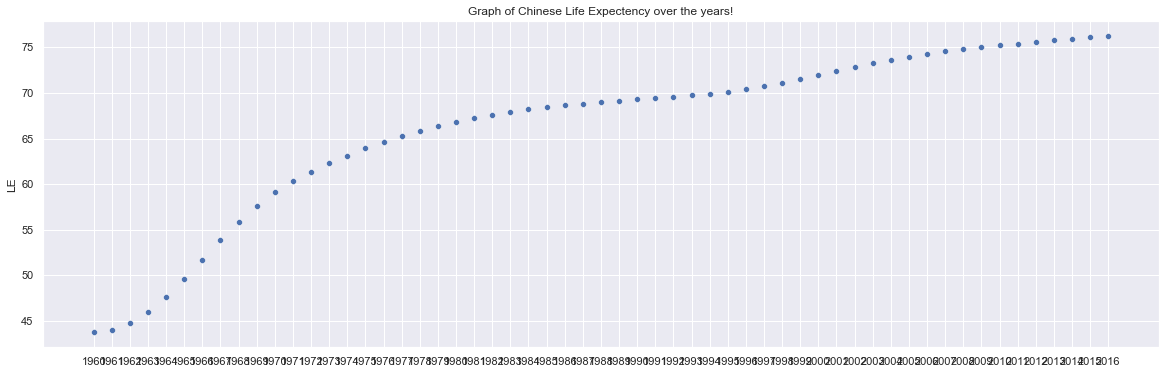

In [83]:
China=life_expectancy.loc[life_expectancy["Country Name"] == "China"]
columnsNamesArr=China.columns.values
Chinaa=China.drop(columns=["Country Name", "Country Code","Indicator Name", "Indicator Code"])
Chinaaa=Chinaa.transpose()
Chinaaa.columns = ['LE']
Chinaaa.head()
new=columnsNamesArr[4:63]
plt.figure(figsize=(20,6))
plt.title("Graph of Chinese Life Expectency over the years!")
sns.scatterplot(new, y=Chinaaa['LE'])

C:\Users\ragun\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Chinese Life Expectency'}, xlabel='LE'>

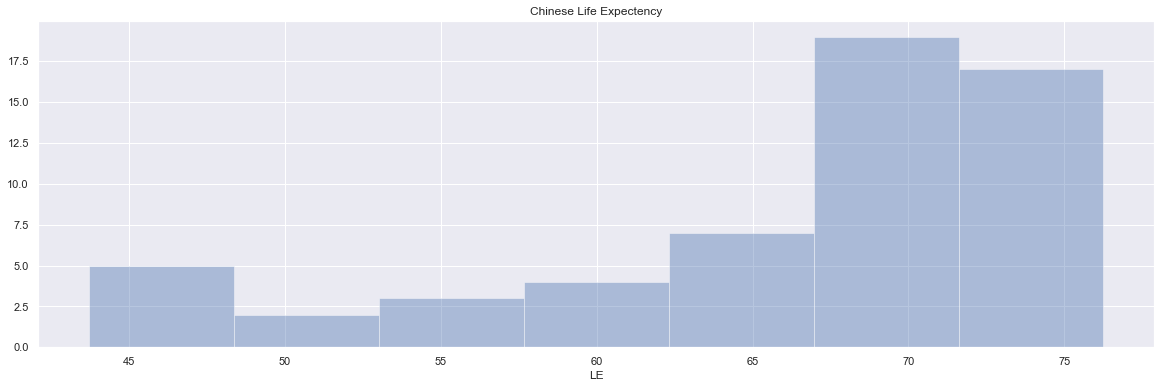

In [85]:
plt.figure(figsize=(20,6))
plt.title("Chinese Life Expectency")
sns.distplot(a=Chinaaa['LE'], kde=False)

<AxesSubplot:title={'center':'Chinese Life Expectency'}, xlabel='LE', ylabel='Density'>

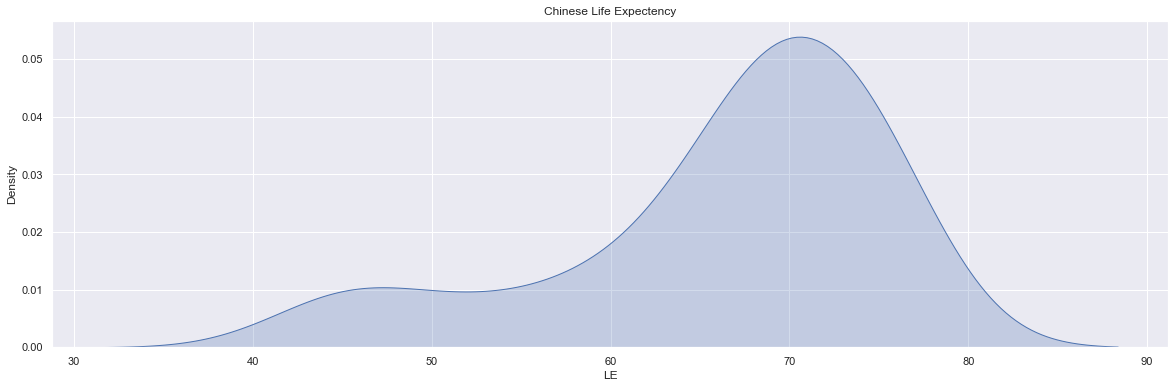

In [86]:
plt.figure(figsize=(20,6))
plt.title("Chinese Life Expectency")
sns.kdeplot(data=Chinaaa['LE'], shade=True)

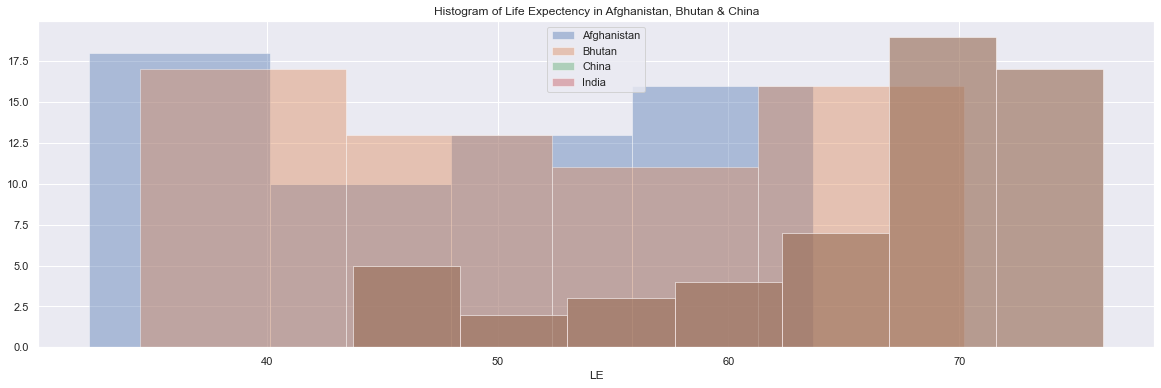

In [89]:
# Histograms for each species
China=life_expectancy.loc[life_expectancy["Country Name"] == "China"]
columnsNamesArr=China.columns.values
Chinaa=China.drop(columns=["Country Name", "Country Code","Indicator Name", "Indicator Code"])
Chinaaa=Chinaa.transpose()
Chinaaa.columns = ['LE']
Chinaaa.head()
new=columnsNamesArr[4:63]
#plt.figure(figsize=(20,6))
#plt.title("Graph of Chinese Life Expectency over the years!")
#sns.scatterplot(new, y=Chinaaa['LE'])


BTN=life_expectancy.loc[life_expectancy["Country Name"] == "Bhutan"]
columnsNamesArrbtn=BTN.columns.values
BTN_new=BTN.drop(columns=["Country Name", "Country Code","Indicator Name", "Indicator Code"])
BTN_a=BTN_new.transpose()
BTN_a.columns = ['LE']
BTN_a.head()
btnnew=columnsNamesArr[4:63]
#plt.figure(figsize=(20,6))

AFG=life_expectancy.loc[life_expectancy["Country Name"] == "Afghanistan"]
columnsNamesArrafg=AFG.columns.values
AFG_new=AFG.drop(columns=["Country Name", "Country Code","Indicator Name", "Indicator Code"])
AFG_a=AFG_new.transpose()
AFG_a.columns = ['LE']
AFG_a.head()
afgnew=columnsNamesArr[4:63]
#plt.figure(figsize=(20,6))

plt.figure(figsize=(20,6))
sns.distplot(a=AFG_a['LE'], label="Afghanistan", kde=False)
sns.distplot(a=BTN_a['LE'], label="Bhutan", kde=False)
sns.distplot(a=Chinaaa['LE'], label="China", kde=False)
sns.distplot(a=Chinaaa['LE'], label="India", kde=False)

# Add title
plt.title("Histogram of Life Expectency in Afghanistan, Bhutan & China")

# Force legend to appear
plt.legend()


## References

World Development Indicators

https://datacatalog.worldbank.org/dataset/environment-social-and-governance-data

https://datacatalog.worldbank.org/dataset/health-nutrition-and-population-statistics-wealth-quintile

https://www.kaggle.com/shabou/world-developement-indicators-environment?select=WDI-Environment.csv


COVID 19 Indicators

http://pubdocs.worldbank.org/en/589511605042232186/COVID-19-Hzigh-Frequency-Monitoring-Dashboard-Data-Dictionary.xls
https://www.google.com/covid19/mobility/

https://www.kaggle.com/ravisankarnadimpalli/world-bank-india